# Predicting the next decisions with tones

In [1]:
%config InlineBackend.figure_format='retina'
import logging
import warnings
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)
warnings.filterwarnings('ignore')
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

version: 0.1.33+28.g90d1dea.dirty
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
data_dir = "../data/fomc"

## Load a feature set

In [3]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_tone_features"
fs_cfg.data_dir = data_dir
fs = eKonf.instantiate(fs_cfg)

## Auto ML with econ data

In [4]:
econ_cols = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]

fs.COLUMN.X = econ_cols

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_lm'
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_econ = eKonf.instantiate(model_cfg, dataset=fs)

In [5]:
model_econ.fit()
model_econ.save()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 6, 'num_leaves': 12, 'min_child_samples': 22, 'learning_rate': 1.0, 'log_max_bin': 9, 'colsample_bytree': 0.6151176895973893, 'reg_alpha': 0.0410723001576519, 'reg_lambda': 0.6109052265588026}
Best accuracy on validation data: 0.7456
Training duration of best run: 0.08016 s


Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 6, 'num_leaves': 12, 'min_child_samples': 22, 'learning_rate': 1.0, 'log_max_bin': 9, 'colsample_bytree': 0.6151176895973893, 'reg_alpha': 0.0410723001576519, 'reg_lambda': 0.6109052265588026}
Best accuracy on validation data: 0.7456
Training duration of best run: 0.08016 s


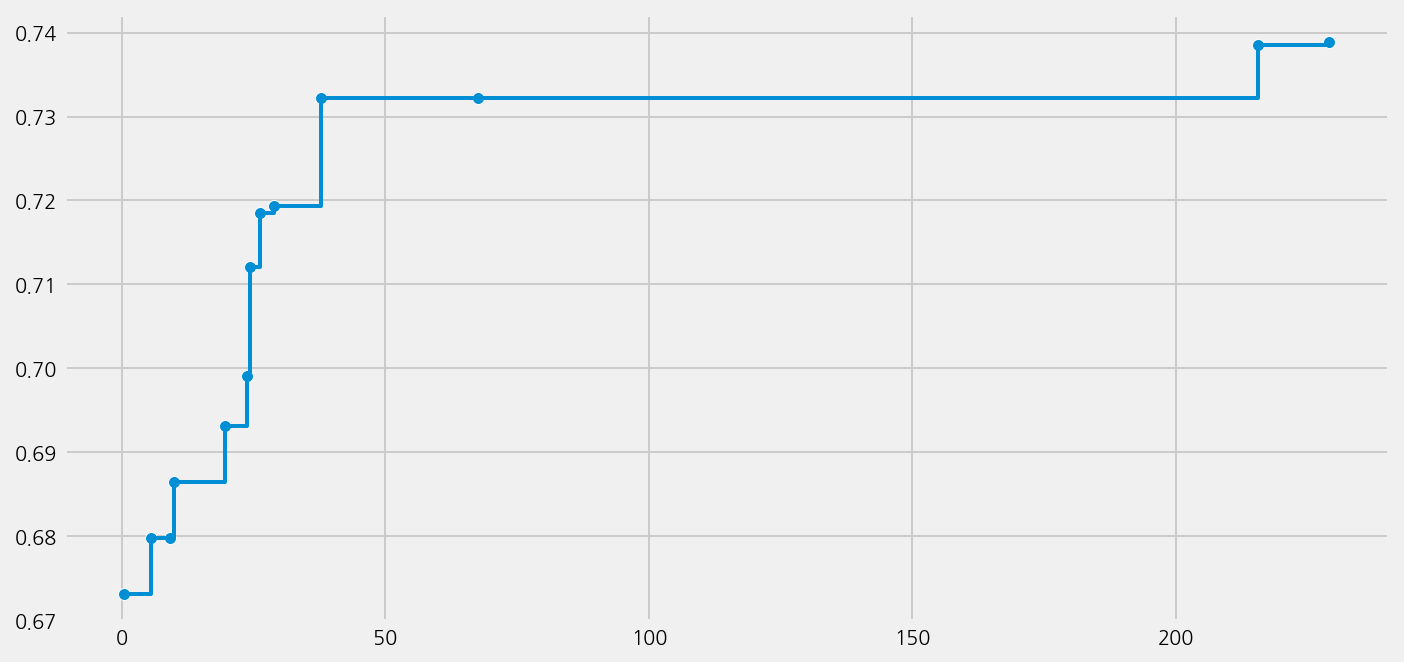

In [6]:
model_econ.load()
model_econ.show_results()
model_econ.plot_learning_curve()

r2: -0.45446985446985444
mse: 0.803030303030303
mae: 0.5
Accuracy:  0.6515151515151515
Precison:  0.6015325670498084
Recall:  0.6515151515151515
F1 Score:  0.5940357313858171
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.50      0.10      0.17        10
        Hike       0.33      0.18      0.24        11
        Hold       0.69      0.89      0.78        45

    accuracy                           0.65        66
   macro avg       0.51      0.39      0.39        66
weighted avg       0.60      0.65      0.59        66



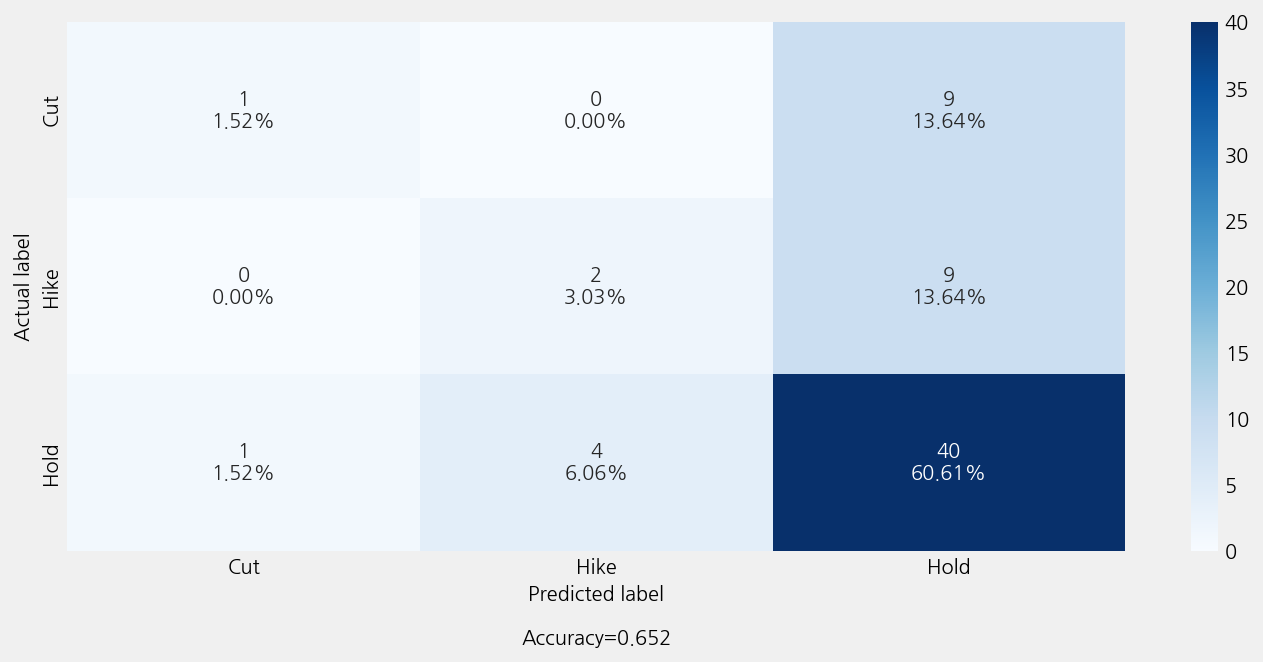

In [7]:
model_econ.eval()

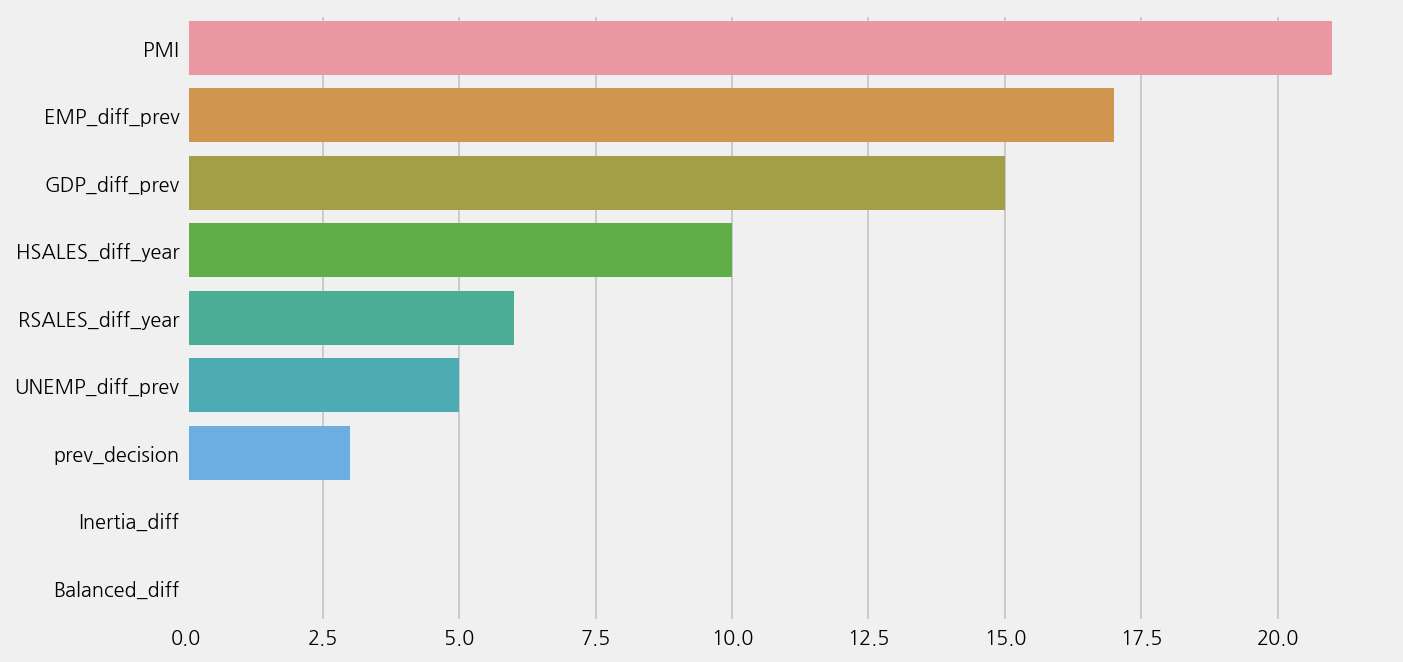

In [8]:
model_econ.plot_feature_importance()

## Auto ML with LM tones

In [28]:
lm_cols = ['polarity_diffusion_minutes', 'polarity_diffusion_speech']
fs.COLUMN.X = econ_cols + lm_cols

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_lm'
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_lm = eKonf.instantiate(model_cfg, dataset=fs)

In [29]:
model_lm.fit()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 13, 'num_leaves': 9, 'min_child_samples': 18, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.8073120721209749, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.026280250067218697}
Best accuracy on validation data: 0.7529
Training duration of best run: 0.2223 s


In [30]:
model_lm.best_estimator

LGBMClassifier(colsample_bytree=0.8073120721209749, learning_rate=1.0,
               max_bin=1023, min_child_samples=18, n_estimators=13,
               num_leaves=9, reg_alpha=0.0009765625,
               reg_lambda=0.026280250067218697, verbose=-1)

In [31]:
model_lm.save()

In [32]:
model_lm.load()

In [33]:
model_lm.show_results()

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 13, 'num_leaves': 9, 'min_child_samples': 18, 'learning_rate': 1.0, 'log_max_bin': 10, 'colsample_bytree': 0.8073120721209749, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.026280250067218697}
Best accuracy on validation data: 0.7529
Training duration of best run: 0.2223 s


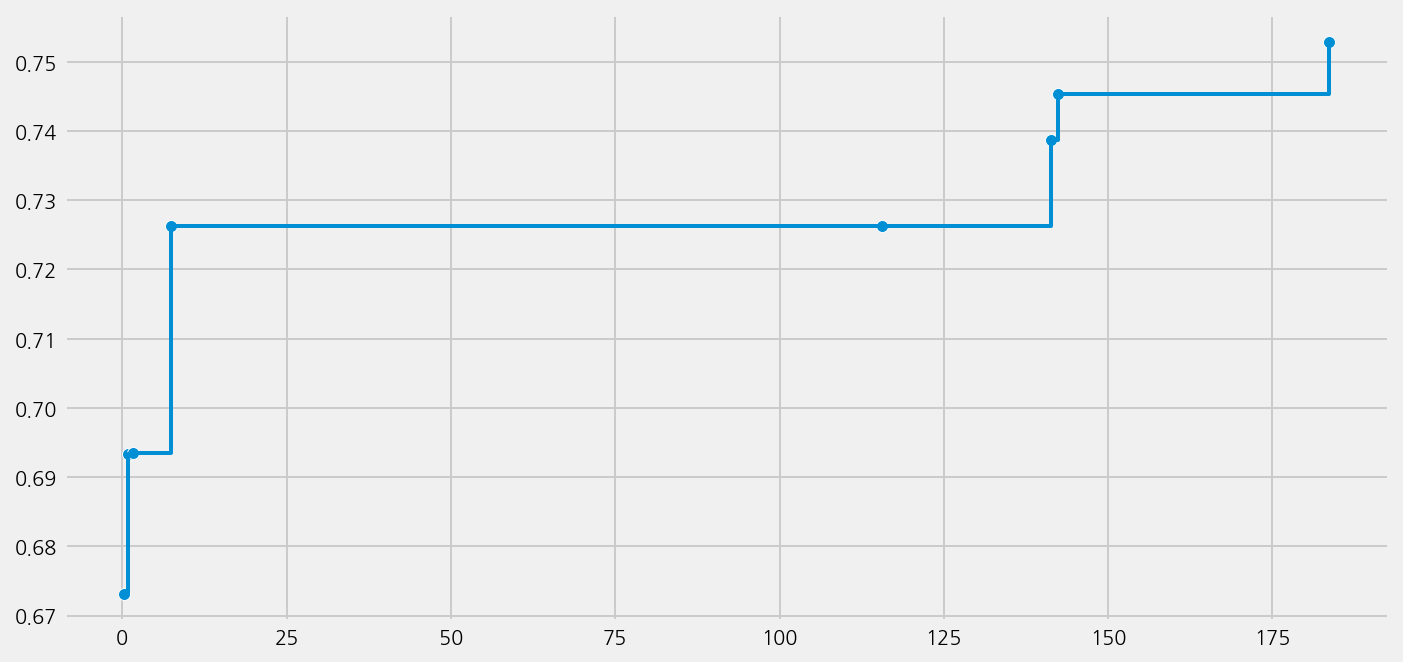

In [34]:
model_lm.plot_learning_curve()

r2: -0.5916839916839918
mse: 0.8787878787878788
mae: 0.5454545454545454
Accuracy:  0.6212121212121212
Precison:  0.5881895881895881
Recall:  0.6212121212121212
F1 Score:  0.5964958867020723
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.40      0.20      0.27        10
        Hike       0.33      0.27      0.30        11
        Hold       0.69      0.80      0.74        45

    accuracy                           0.62        66
   macro avg       0.48      0.42      0.44        66
weighted avg       0.59      0.62      0.60        66



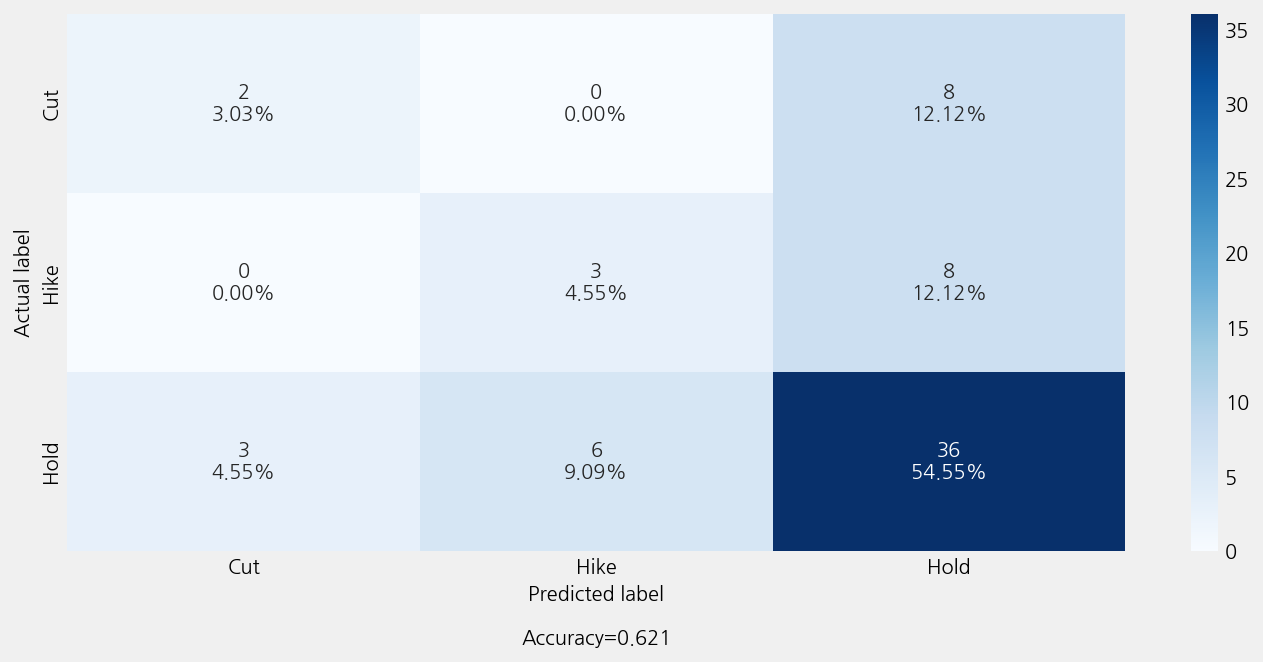

In [35]:
model_lm.eval()

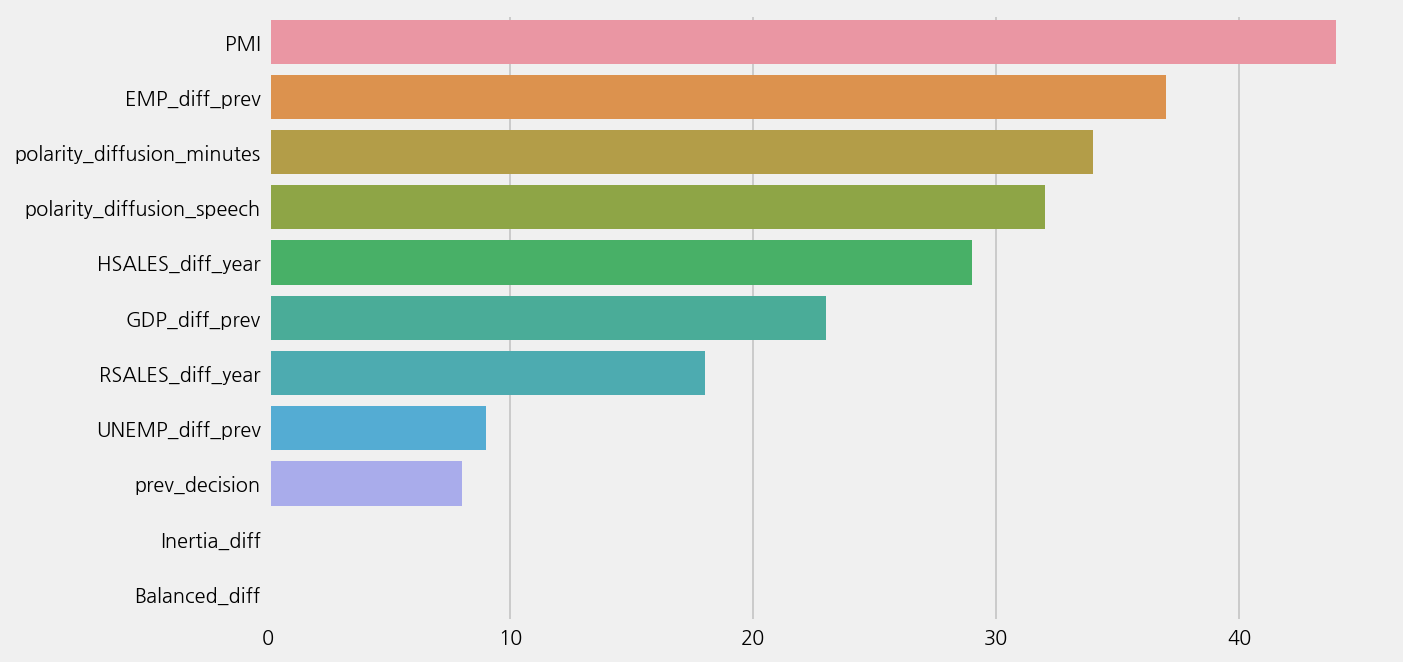

In [36]:
model_lm.plot_feature_importance()

## Auto ML with finbert tones

In [37]:
finbert_cols = ['finbert_diffusion_minutes', 'finbert_diffusion_speech']
fs.COLUMN.X = econ_cols + finbert_cols

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_finbert'
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_finbert = eKonf.instantiate(model_cfg, dataset=fs)

In [38]:
model_finbert.fit()
model_finbert.save()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 6, 'max_leaves': 20, 'min_child_weight': 0.0032603326981582993, 'learning_rate': 0.8025984580504936, 'subsample': 0.9793456785422703, 'colsample_bylevel': 0.65007954279483, 'colsample_bytree': 0.672965435185822, 'reg_alpha': 0.001785838507319488, 'reg_lambda': 0.47215969661434976}
Best accuracy on validation data: 0.732
Training duration of best run: 0.06369 s


Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 6, 'max_leaves': 20, 'min_child_weight': 0.0032603326981582993, 'learning_rate': 0.8025984580504936, 'subsample': 0.9793456785422703, 'colsample_bylevel': 0.65007954279483, 'colsample_bytree': 0.672965435185822, 'reg_alpha': 0.001785838507319488, 'reg_lambda': 0.47215969661434976}
Best accuracy on validation data: 0.732
Training duration of best run: 0.06369 s


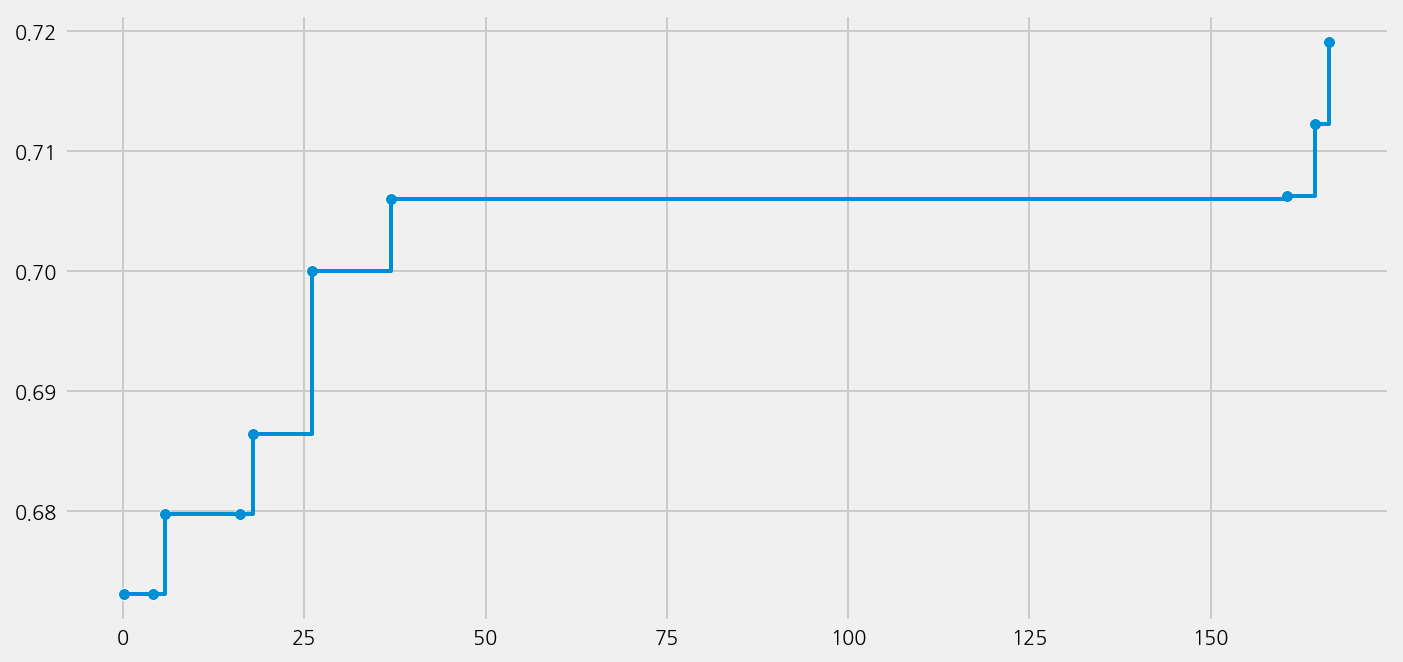

In [39]:
model_finbert.show_results()
model_finbert.plot_learning_curve()

r2: -0.34469854469854466
mse: 0.7424242424242424
mae: 0.4393939393939394
Accuracy:  0.7121212121212122
Precison:  0.5997474747474748
Recall:  0.7121212121212122
F1 Score:  0.6368729309905782
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.00      0.00      0.00        10
        Hike       0.67      0.36      0.47        11
        Hold       0.72      0.96      0.82        45

    accuracy                           0.71        66
   macro avg       0.46      0.44      0.43        66
weighted avg       0.60      0.71      0.64        66



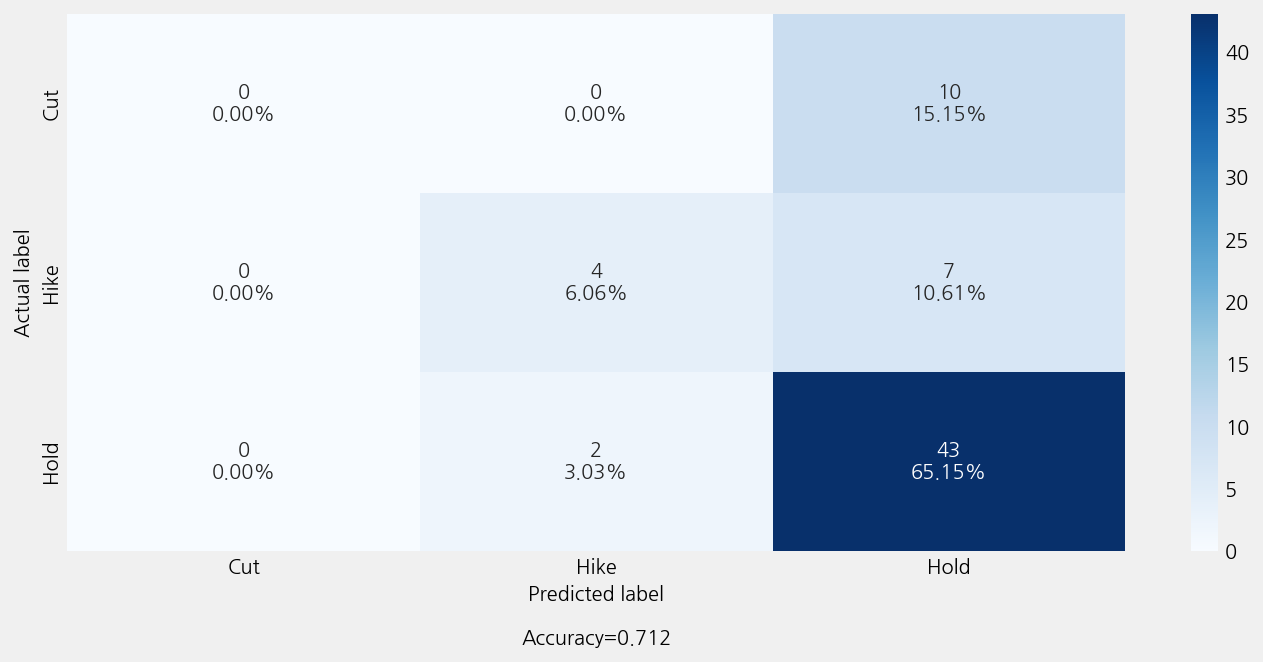

In [40]:
model_finbert.eval()

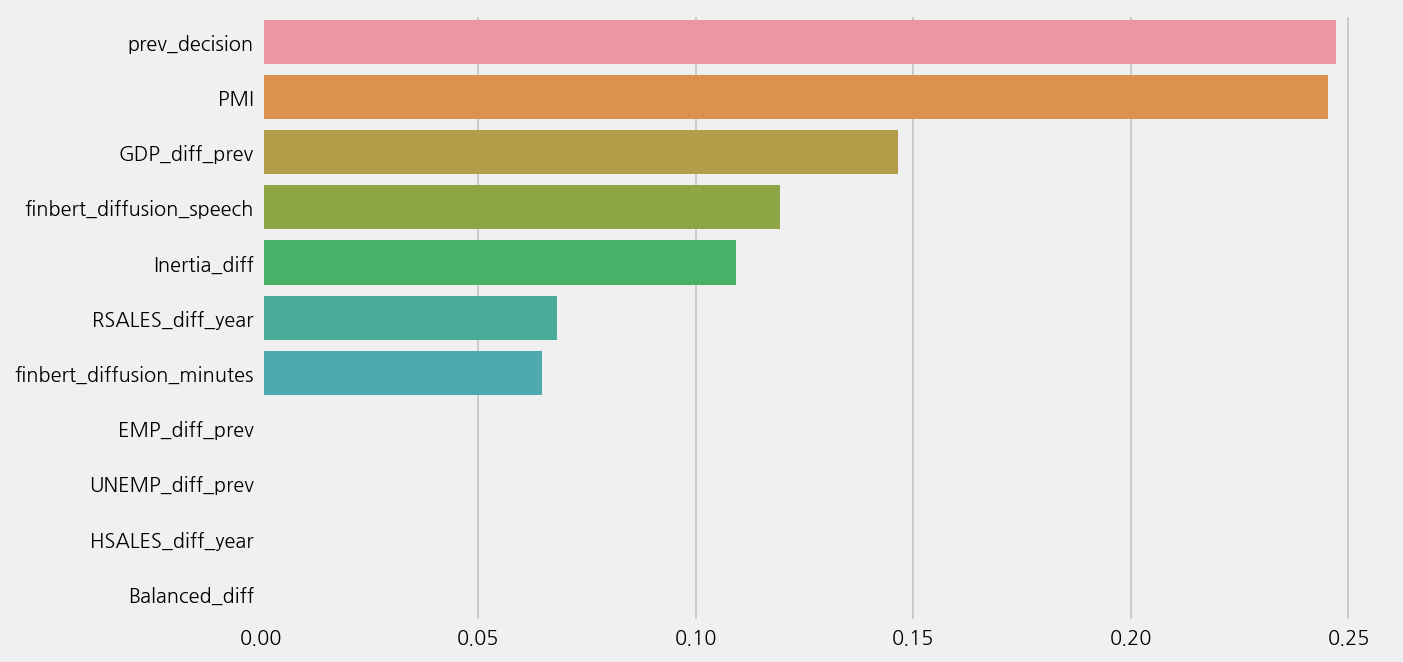

In [41]:
model_finbert.plot_feature_importance()

## Auto ML with T5 tones

In [42]:
t5_cols = ['t5_diffusion_minutes', 't5_diffusion_speech']
fs.COLUMN.X = econ_cols + t5_cols

model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.name = 'fomc_tone_t5'
model_cfg.config.time_budget = 1000
model_cfg.verbose = False
model_t5 = eKonf.instantiate(model_cfg, dataset=fs)

In [43]:
model_t5.fit()
model_t5.save()

INFO:flaml.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 7, 'max_depth': 5, 'min_child_weight': 2.679706026453727, 'learning_rate': 0.01545220130427584, 'subsample': 1.0, 'colsample_bylevel': 0.8939241734827547, 'colsample_bytree': 1.0, 'reg_alpha': 0.0112442822962447, 'reg_lambda': 25.212986089077653}
Best accuracy on validation data: 0.7327
Training duration of best run: 0.07241 s


Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 7, 'max_depth': 5, 'min_child_weight': 2.679706026453727, 'learning_rate': 0.01545220130427584, 'subsample': 1.0, 'colsample_bylevel': 0.8939241734827547, 'colsample_bytree': 1.0, 'reg_alpha': 0.0112442822962447, 'reg_lambda': 25.212986089077653}
Best accuracy on validation data: 0.7327
Training duration of best run: 0.07241 s


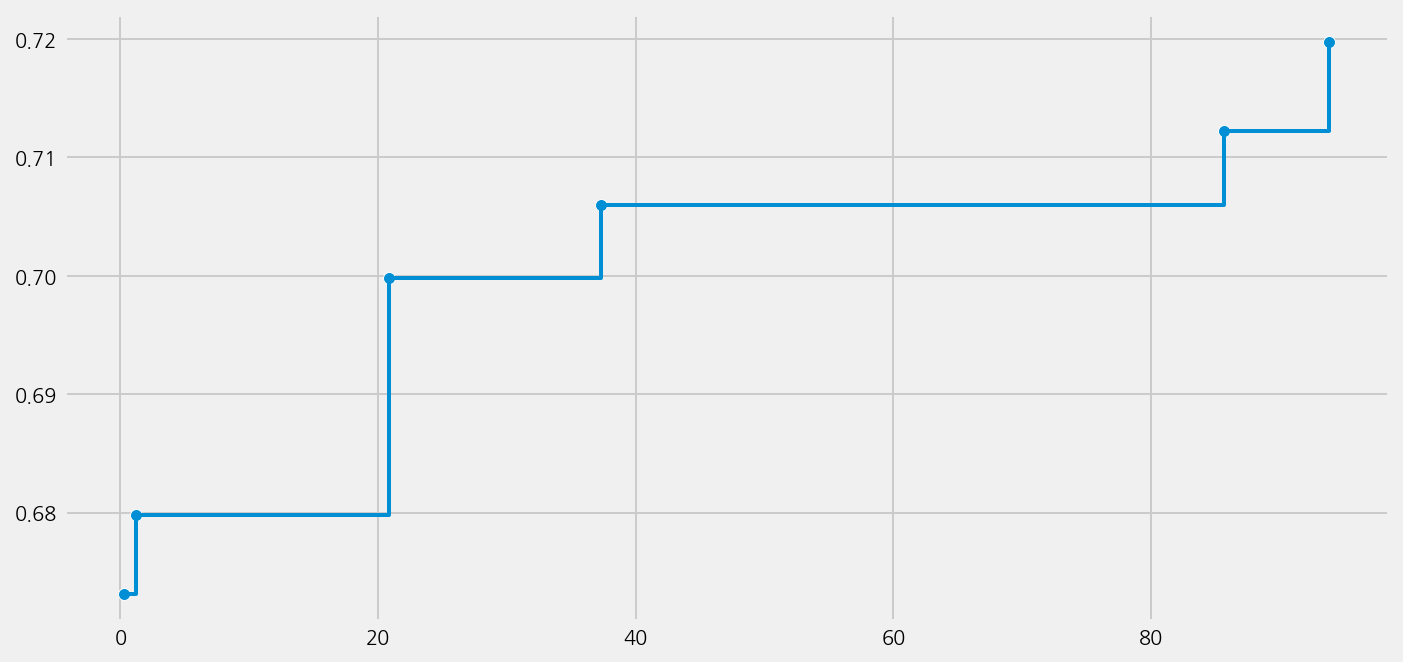

In [44]:
model_t5.show_results()
model_t5.plot_learning_curve()

r2: -0.34469854469854466
mse: 0.7424242424242424
mae: 0.4393939393939394
Accuracy:  0.7121212121212122
Precison:  0.6893939393939394
Recall:  0.7121212121212122
F1 Score:  0.6503607503607504
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

         Cut       0.50      0.10      0.17        10
        Hike       0.75      0.27      0.40        11
        Hold       0.72      0.96      0.82        45

    accuracy                           0.71        66
   macro avg       0.66      0.44      0.46        66
weighted avg       0.69      0.71      0.65        66



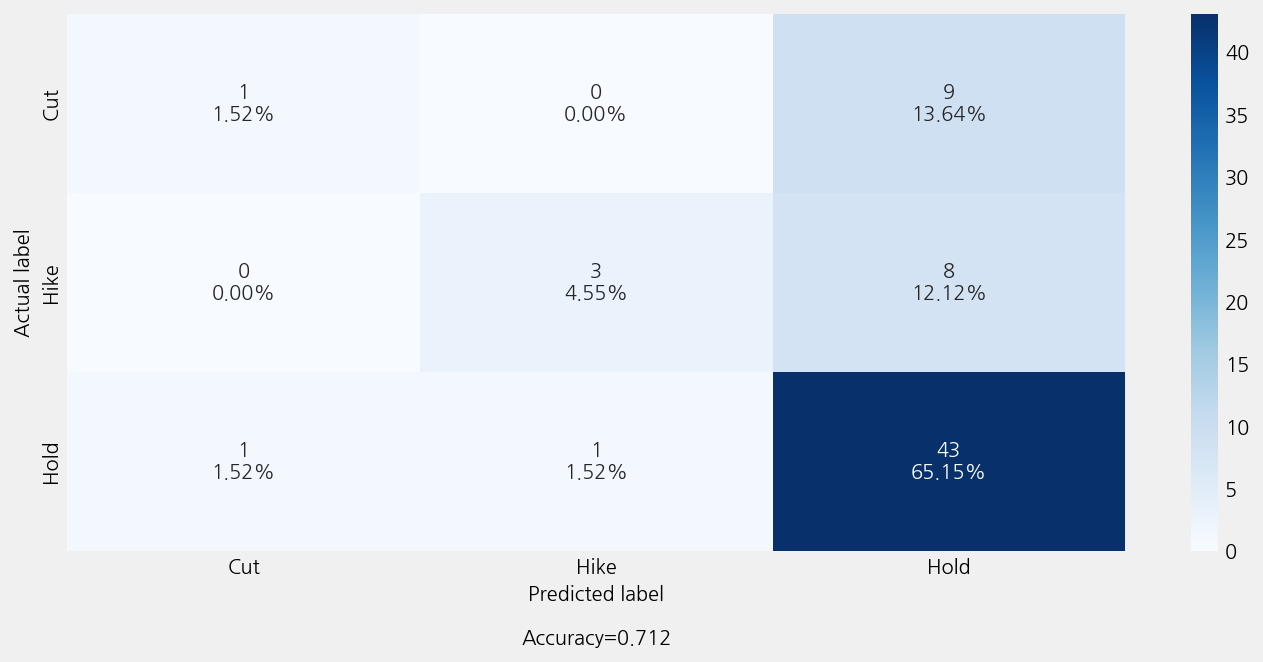

In [45]:
model_t5.eval()

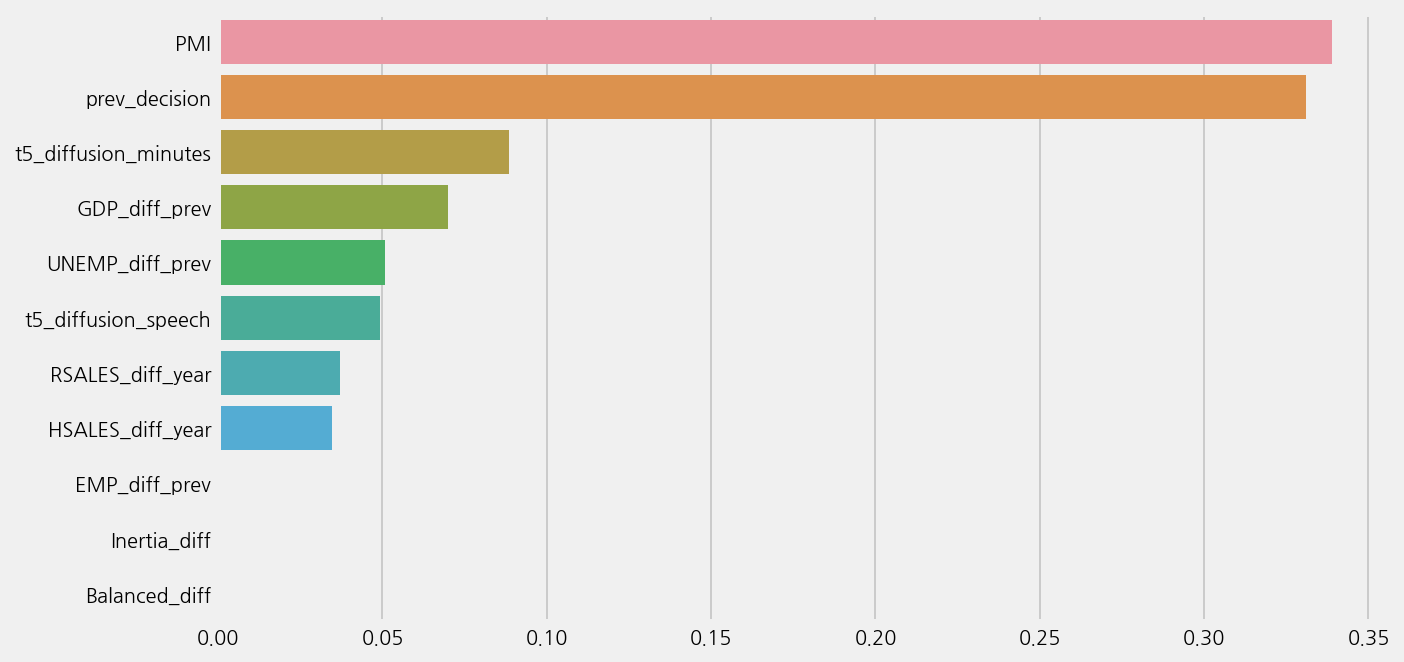

In [46]:
model_t5.plot_feature_importance()